# **Atlas-Proteinas Proyecto con cada color por separado**


#Preprocesamiento de las imagenes
Para este proyecto, se propuso realizar la clasificación de manera separada por los cuatro colores: verde, rojo, azul y amarillo, que componen el conjunto de datos de las imágenes de diferentes tejidos donde se aprecian varios organelos celulares. Una estrategia que se utiliza en este proyecto es la redimensión de tamaño de la imagen original a un cuarto con la aplicación de la técinca de extensión del histograma (histogram stretching).

Este es un método que mejora el contraste de una imagen para extender el rango de intensidad. Esto ecualización implica el mapeo de una distribución (el histograma dado de la imagen) a otra distribución más amplia y uniforme de los valores de intensidad que se extiendan por todo el rango.

Para lograr el efecto de ecualización, la reasignación debe ser la función de distribución acumulativa. Para el histograma $H(i)$, su distribución acumulativa $H^{'}(i)$ es:

$H^{'}(i) = \sum_{0 \le j <i} H (j)$

De esta manera, la normalización de $H^{'}(i)$  se realiza de manera que el valor máximo sea 255.

In [0]:
"""
!mkdir yellow
!mv *_yellow.png yellow/
!mkdir red
!mv *_red.png red/
!mkdir green
!mv *_green.png green/
!mkdir blue
!mv *_blue.png blue/


import os 
import cv2
     
PATH = os.getcwd()
  
train_path = '/content/drive/My Drive/proteina_proyecto/blue' #yellow' #green' # red'
train_batch = os.listdir(train_path)
x_train = []
i = 0
     
# if data are in form of images
for sample in train_batch:
	img_path = sample
	img = cv2.imread(train_path+img_path, cv2.IMREAD_UNCHANGED)

	scale_percent = 50 # percent of original size
	width = int(img.shape[1] * scale_percent / 100)
	height = int(img.shape[0] * scale_percent / 100)
	dim = (width, height)
	# resize image
	resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) #redimensiona
  equ = cv2.equalizeHist(resized)
	cv2.imwrite(train_path+sample,equ)

print(len(train_batch))
"""

"\n!mkdir yellow\n!mv *_yellow.png yellow/\n!mkdir red\n!mv *_red.png red/\n!mkdir green\n!mv *_green.png green/\n!mkdir blue\n!mv *_blue.png blue/\n\n\nimport os \nimport cv2\n     \nPATH = os.getcwd()\n  \ntrain_path = '/content/drive/My Drive/proteina_proyecto/blue' #yellow' #green' # red'\ntrain_batch = os.listdir(train_path)\nx_train = []\ni = 0\n     \n# if data are in form of images\nfor sample in train_batch:\n\timg_path = sample\n\timg = cv2.imread(train_path+img_path, cv2.IMREAD_UNCHANGED)\n\n\tscale_percent = 50 # percent of original size\n\twidth = int(img.shape[1] * scale_percent / 100)\n\theight = int(img.shape[0] * scale_percent / 100)\n\tdim = (width, height)\n\t# resize image\n\tresized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) #redimensiona\n  equ = cv2.equalizeHist(resized)\n\tcv2.imwrite(train_path+sample,equ)\n\nprint(len(train_batch))\n"

# **Preprocesamiento de redundancia entre las imágenes**


En los conjuntos de datos de imágenes que suelen ser grandes es importante hacer procesos que reduzcan el ruido entre los elementos y disminuir la información que bajo ciertos enfoques, no garantizan la mejor extracción de características que describen la imagen y puede considerarse repetitiva o redundante cuando se comparan con las demás imágenes en este conjunto. Una forma de evaluar esta relación, entre otras que existen en la literatura, es mediante el cálculo del error cuadrático medio $E$ entre dos imágenes:

$E= \frac{\sum_{i=1}^{m} \sum_{j=1}^{n}( X_{ij}-Y_{ij})^{2}} {m \cdot n}$

Donde  $X_{ij}$ y $Y_{ij}$ representan las matrices de los pixeles de las dos imágenes de igual tamaño de $mxn$ píxeles. Para seleccionar el grado de similaridad entre dos imágenes se asigna un grado $\alpha$ de pertenencia, donde un error de 0 indica comparar una imágen contra sí misma.

Esta métrica fue elegida debido a que presentaba menor costo computacional y además una aproximación más factible de realizar, ya que es una comparación de tamaño $N^{2}$ del conjunto de imágenes y para este caso, el tiempo y los recursos computacionales son limitados. Para empezar a realizar este análisis, es necesario dividir el conjunto de datos por clases:

In [0]:
import Image
#from skimage.measure import structural_similarity as ssim
#import matplotlib.pyplot as plt
import glob
import sys
import cv2
import shutil
import pandas as pd
import os, fnmatch
import itertools
import numpy as np
import multiprocessing

def myfunc(nam,g):
 w=g.loc[g['Id']==nam,'Target'].iloc[0]
 arr=w.split()
 return arr

def palname(nam):
 name=nam.replace('_green.png','').replace('','')
 return name

class MyImage:
 def __init__(self, img_name,g):
  self.img = cv2.imread(img_name)
  self.name =palname(img_name)
  self.name2=img_name
  self.targets=myfunc(self.name,g)

 def __str__(self):
  return self.name


for i in range(0,28):
 path =  str(i)
 try:
     os.mkdir(path)
 except OSError:
     print ("Creation of the directory %s failed" % path)
     shutil.copy('passgreen.py', path)
     shutil.copy('SIMD_M.py', path)
 else:
     print ("Successfully created the directory %s " % path)
     newPath = shutil.copy('train.csv', path)
     shutil.copy('passgreen.py', path)
     shutil.copy('SIMD_M.py', path)

greens=pd.read_csv('greens.csv')
files=glob.glob ("*.png")
for myFile in files:
 Imag=MyImage (myFile,greens)
 for x in Imag.targets:
  cop=str(x)
  shutil.copy(Imag.name2 , cop)

 #Images.append(x)


Psoteriormente, dentro de cada carpeta se separan desde archivo de las clases para almacenarlos en las clases específicas, generando el .csv respectivo, para el caso de las imágenes verdes se tiene:

In [0]:

import pandas as pd
import glob
import os, fnmatch
import numpy as np

green=[]

listOfFiles = os.listdir('.')
pattern = "*.png"
for entry in listOfFiles:
 if fnmatch.fnmatch(entry, pattern):
  print (entry)
  green.append(entry)

set=[]
print "me parto"
for x in green:
 p=x.replace('_green.png','').replace('','')
 set.append(p)
lst=pd.DataFrame(set,columns=['Id'])
#print(lst)
df=pd.read_csv("train.csv")
#print(df.head())
df3= df[df['Id'].isin(lst['Id'])]
df3.to_csv('greens.csv')

Esta comparación se hace imágen contra imágen dentro de cada clase, se tomo un $\alpha$ de aproximádamente $90\%$ de similaridad, además, se realizó la vectorizanción SIMD para acelerar los procesos de cálculo. Este criterio de similaridad refleja que si se trata de una imágen muy similar a otra o bien, que ambas aportan casi la misma información, entonces la el criterio es remover la que tenga contenga menos clases. Si bien otros métodos como medidas de similaridad estructural o comparación de histogramas tiener mayor confiabilidad, resulta complicado su aplicación a esta escala de este conjunto de datos. Esto se realiza mediante el siguiente programa:

In [0]:
import Image
from skimage.measure import structural_similarity as ssim
#import matplotlib.pyplot as plt
import glob
import sys
import cv2
import pandas as pd
#import os, fnmatch
import itertools
import os
import numpy as np
import multiprocessing


def myfunc(nam,g):
 w=g.loc[g['Id']==nam,'Target'].iloc[0]
 arr=w.split()
 return arr

def palname(nam):
 name=nam.replace('_green.png','').replace('','')
 return name

class MyImage:
 def __init__(self, img_name,g):
  self.img = cv2.imread(img_name)
  self.name =palname(img_name)
  self.targets=myfunc(self.name,g)

 def __str__(self):
  return self.name

def mse(imageA,imageB):
 err = np.sum((imageA.astype("float")-imageB.astype("float"))**2)
 err/=float(imageA.shape[0]*imageA.shape[1])
 return err

def comparador(s):
 buffer=[]
 fc=s[0]
 fw=s[1]
 permisible=200
 m=mse(fc.img,fw.img)
 if (m != 0 and m < permisible):
  print "se dio"
  #b=0
  if(len(fc.targets) >= len(fw.targets)):
 #  print "aqui"
   buffer.append(fc)
  else:
#   print "aqui 2"
   buffer.append(fw)
 return buffer

def apoyo(elementos):
 x=comparador(elementos)
 return x

Final=[]
greens=pd.read_csv('greens.csv')
Images=[]
permisible=200
start=0
#stop=21
 #uno mas donde se para
files=glob.glob ("*.png")
for myFile in files:
#for myFile in itertools.islice(files,start,stop):
 x=MyImage (myFile,greens)
 Images.append(x)
stop=len(Images)
print('My image shape:',stop)
for i in range(start,stop-1):
 print "i va en"
 print i
 dif=(stop-i)
 cont=0
 paso= dif // multiprocessing.cpu_count()
 if (dif>multiprocessing.cpu_count()):
  for j in range(i,stop):
   v=[]
   cont=cont+1
   flag=0
   if(cont <= paso):
    aa=(Images[i], Images[j])
    bb=(Images[i], Images[j+1])
    cc=(Images[i], Images[j+2])
    dd=(Images[i], Images[j+3])
    tup=(aa,bb,cc,dd)
    pool=multiprocessing.Pool(processes=multiprocessing.cpu_count())
    v=pool.map(apoyo,tup)
    pool.close()
    pool.join()
    v= [val for sublist in v for val in sublist]
    if(len(v) != 0):
    # print v
     for m in v:
    # print m
      if(m.name==Images[i].name):
       flag=1
     if(flag==1):
      Final.append(v)
      break
     else:
      Final.append(v)
 else:
  for it in range(i,stop):
   m=mse(Images[i].img,Images[it].img)
   if (m != 0 and m < permisible ):
    if(len(Images[i].targets) >= len(Images[it].targets)):
     Final.append(Images[i])
    else:
     Final.append(Images[it])


Final= [ent for sublist in Final for ent in sublist]
F=(set(Final))
lst=list(F)

os.path.basename(os.path.dirname(os.path.realpath(__file__)))
currentFile = __file__
realPath = os.path.realpath(currentFile)  # /home/user/test/my_script.py
dirPath = os.path.dirname(realPath)
dirName = os.path.basename(dirPath)
lst=pd.DataFrame(lst,columns=['Id ' +str(dirName) ])
name_csv='Redundantes_green_' + str(dirName) +'.csv'
lst.to_csv(name_csv)
#checar reduncdaca al final
#print('V shape:',np.array(F).shape)
for imagen in F:
 print str(imagen)

#Proceso de clasificación

El proceso de clasifciación se realiza mediante algoritmos de redes convolucionales, las cuales necesita importar las siguientes librerias:

In [0]:
from __future__ import print_function
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
import matplotlib.image as img

from numba import jit, cuda 

import os.path as path

from keras.utils import to_categorical
from keras.callbacks import Callback

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

from keras import backend as K


La variables que se necesitan para crear una red de este tipo son el tamaño del batch, el número de clases y el número de épocas, donde cada imagen del conjunto de datos es de $256x256$ pixeles.


In [0]:
batch_size = 64
num_clases = 28
num_epocas = 10
    

dimension_x, dimension_y = 256, 256


Se crea el directorio de trabajo

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se copian los archivos comprimidos de los dataset y se descomprimen en el directorio de trabajo

In [0]:
!cd /content/drive/My Drive/proteina_proyecto/


/bin/bash: line 0: cd: too many arguments


In [0]:

"""
!cp green.zip /proteina
!cp red.zip /proteina
!cp yellow.zip /proteina
!cp blue.zip /proteina
!cp train.csv /proteina

!cp train2.csv /proteina

cd /proteina

!unzip green.zip
!unzip red.zip
!unzip yellow.zip
!unzip blue.zip
"""

/bin/bash: line 0: cd: too many arguments


'\n!cp green.zip /proteina\n!cp red.zip /proteina\n!cp yellow.zip /proteina\n!cp blue.zip /proteina\n!cp train.csv /proteina\n\n!cp train2.csv /proteina\n\ncd /proteina\n\n!unzip green.zip\n!unzip red.zip\n!unzip yellow.zip\n!unzip blue.zip\n'

##Método usado para supervisar la métrica F1

La precisión $P$ de un clasificador se define como:

$P=\frac{Verdaderos \ positivos}{Verdaderos \ positivos+Falsos \ positivos}$

Mientras que el recall  $R$  como:

$R= \frac{Verdaderos \ positivos}{Verdaderos \ positivos+ Falsos \ negativos}$

Entonces, la métrica del F1-Score se denota como:

$F1= \frac{2 \cdot P \cdot R}{P+R}$

Donde los siguientes métodos se implementan para el cálculo de este valor:


In [0]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Se lee el archivo 'train.csv' para train y se representan las etiquetes en un vector de 0 y 1

In [0]:
def getTrainDataset():
    
    path_to_train = '/content/drive/My Drive/proteina_proyecto/blue2/'
    data = pd.read_csv('/content/drive/My Drive/proteina_proyecto/train.csv')

    paths = []
    labels = []
    
    for name, lbl in zip(data['Id'], data['Target'].str.split(' ')):
        y = np.zeros(28)
        for key in lbl:
            y[int(key)] = 1 
        paths.append(os.path.join(path_to_train, name))
        labels.append(y)

    return np.array(paths), np.array(labels)
dataTrain = getTrainDataset()
direcciones = dataTrain[0]
salidas = dataTrain[1]
salidas

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

Se despliegan algunas imágenes del set de entrenamiento con el preprocesamiento ya realizado

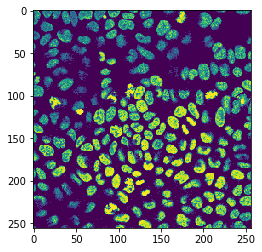

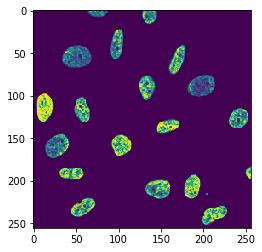

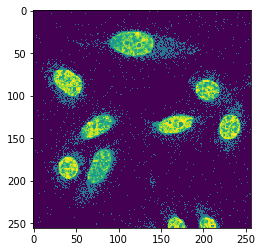

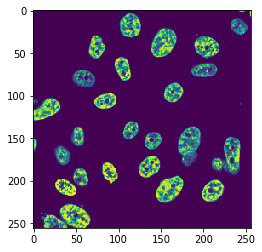

/content/drive/My Drive/proteina_proyecto/blue2/00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_blue.png


(256, 256)

In [0]:
image = Image.open(direcciones[0] + '_blue.png')  
imgplot = plt.imshow(image)  
plt.show()
image = Image.open(direcciones[1] + '_blue.png')  
imgplot = plt.imshow(image)  
plt.show()
image = Image.open(direcciones[2] + '_blue.png')  
imgplot = plt.imshow(image)  
plt.show()
image = Image.open(direcciones[3] + '_blue.png')  
imgplot = plt.imshow(image)  
plt.show() 
image 
print(direcciones[0] + '_blue.png')
image1 = img.imread(direcciones[0] + '_blue.png')
type(image1)
image1.shape

Se cargan las imagenes de entrenamiento en memoria

In [0]:
listaImg = []
target = []
a = 0
b = 0
for instancia in direcciones:
  direccion = instancia + '_blue.png'
  try:
    imagen2 = img.imread(instancia + '_blue.png')
    listaImg.append(imagen2)
    if a%500 ==0:
        print(a)
    a += 1
    target.append(salidas[b])
    #print ('existe')
  except:
    #print('error')
    imagen2 = 'error'
  if a > 30000:
    break
  b += 1
  #print(imagen2)
  #listaImg.append(imagen2)
y_train = np.array(target)
x_train = np.array(listaImg)
#dataTest = np.concatenate((listaImg, target), axis=None)
#dataTest


  


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000


In [0]:
#x_dev = x_train[0:200]
#y_dev = y_train[0:200]

#x_train = x_train[200:]
#y_train = y_train[200:]

In [0]:
len(target)
len(listaImg)
target


In [0]:
x_train = x_train.reshape(x_train.shape[0], dimension_x, dimension_y, 1)
#x_dev = x_dev.reshape(x_dev.shape[0], dimension_x, dimension_y, 1)
input_shape = (dimension_x, dimension_y, 1)
    
x_train = x_train.astype('float32')
#x_dev = x_dev.astype('float32')
x_train /= 255
#x_dev /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
#print(x_dev.shape[0], 'dev samples')

x_train shape: (30001, 256, 256, 1)
30001 train samples


#Modelo de red convolucional

```
Diseño del modelo de la red neuronal convolucional
```
![Esquema de una red neuronal convolucional](https://drive.google.com/uc?id=1XBh3TVlmVgqu9kfiddl6Q_JGnFpClUlt)

Estructura del Modelo CNN en este proyecto es secuencial.

El método **Convolución2D** crea un núcleo de convolución. Este requiere algunas propiedades como se define a continuación:


* filter: El primer parámetro define la forma de salida de la capa. 
* kernel_size: Define el tamaño de la ventana que queremos usar y que se desplazará a lo largo de la imagen.
* input_shape: Se utiliza para definir el tamaño de entrada de cada imagen. 
* activation: La función de activación se define en este parámetro. 

El método **MaxPool2D** se utiliza para reducir la escala de las salidas.

* pool_size: Define el tamaño de la matriz que define el número de valores de píxeles que se convertirán a 1 valor.
* data_format: El formato de los datos.

El método **BatchNormalization** normaliza la salida de la función de activación anterior:

* axis: Define el eje que se desea normalizar.

El método **Dropout** selecciona aleatoriamente algunos de los valores que se van a poner a 0 para evitar el sobreajuste en el modelo:

* rate: Fracciones de entrada que deben ser eliminadas.

El método **Flatten** aplana la matriz n-dimensional completa en un solo arreglo.

El método **Dense** Define una capa de red neuronal densamente conectada.

El modelo de red neuronal convolucional usado en keras se define como:

---



In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape =input_shape, activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=28))

Copilando el modelo:

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(),metrics=['accuracy', f1])

Así mismo, el entrenamiento de este modelo se realiza de la siguiente manera:

In [0]:
y_binary = to_categorical(y_train)
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=200,
              verbose=1,
              #validation_data=(x_dev, y_dev)
              validation_split = 0.1, shuffle = 1)

Train on 27000 samples, validate on 3001 samples
Epoch 1/200
27000/27000 [==============================] - 36s 1ms/sample - loss: 5.7672 - accuracy: 0.0378 - f1: 0.1058 - val_loss: 5.5421 - val_accuracy: 0.0240 - val_f1: 0.1138
Epoch 2/200
27000/27000 [==============================] - 29s 1ms/sample - loss: 5.6444 - accuracy: 0.0449 - f1: 0.1136 - val_loss: 5.4322 - val_accuracy: 0.0556 - val_f1: 0.1245
Epoch 3/200
27000/27000 [==============================] - 29s 1ms/sample - loss: 5.5719 - accuracy: 0.0462 - f1: 0.1169 - val_loss: 5.4136 - val_accuracy: 0.0480 - val_f1: 0.1215
Epoch 4/200
27000/27000 [==============================] - 29s 1ms/sample - loss: 5.4971 - accuracy: 0.0531 - f1: 0.1209 - val_loss: 5.3644 - val_accuracy: 0.0500 - val_f1: 0.1221
Epoch 5/200
27000/27000 [==============================] - 29s 1ms/sample - loss: 5.4450 - accuracy: 0.0575 - f1: 0.1235 - val_loss: 5.3527 - val_accuracy: 0.0487 - val_f1: 0.1205
Epoch 6/200
27000/27000 [==========================

Almacenando el modelo:



In [0]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('blue.h5')

#Predicción de imágenes test

Para la predicción del modelo se cargan los archivos del conjunto de datos de entrenamiento desde el google drive:

In [0]:
ejemplo = pd.read_csv('sample_submission.csv')
ejemplo
ejemplo_nombres = ejemplo['Id']
ejemplo_nombres

In [0]:
listaImg = []
target = []

a = 0

for instancia in ejemplo_nombres:
  direccion = 'blue/'+ instancia + '_blue.png'
  #print(direccion)
  try:
    imagen2 = img.imread(direccion)
    listaImg.append(imagen2)
    if a%500 == 0:
      print(a)
    a += 1
    #print (direccion)
  except:
    print('error')
    imagen2 = 'error'
    if a > 6000:
      break
  #print(imagen2)
  #listaImg.append(imagen2)

x_test = np.array(listaImg)
#dataTest = np.concatenate((listaImg, target), axis=None)
#dataTest

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500


In [0]:
x_test = x_test.reshape(x_test.shape[0], dimension_x, dimension_y, 1)
input_shape = (dimension_x, dimension_y, 1)
    
x_test = x_test.astype('float32')
x_test /= 255
print('x_test shape:', x_test.shape)
print(x_test.shape[0], 'test samples')


x_test shape: (11702, 256, 256, 1)
11702 test samples


Se generan las predicciones a partir del modelo entrenado

In [0]:
salida = model.predict(x_test)

In [0]:
salida

# Generación de archivo para Kaggle

In [0]:
resultados = []
for dato in salida:
  resultado = ''
  for i in range(0,28):
    if dato[i] > 0.001:
      resultado = resultado + ' ' + str(i) 
  resultado = resultado[1:]
  print (resultado)
  resultados.append(resultado)

resultados




0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 9 11 12 13 14 16 17 18 19 21 22 23 24 25 26
0 1 2 3 4 5 6 7 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
0 1 2 3 4 5 6 7 8 9 1

['0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 18 19 20 21 22 23 24 25 26',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 9 11 12 13 14 16 17 18 19 21 22 23 24 25 26',
 '0 1 2 3 4 5 6 7 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 8 9 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 16 17 18 19 21 22 23 24 25 26 27',
 '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 

In [0]:
resultadosCsv = pd.concat([
    pd.DataFrame(ejemplo_nombres),pd.DataFrame(resultados)
], axis=1)

resultadosCsv.columns=['Id', 'Predicted']

resultadosCsv.to_csv("submission12e.csv", index=False)
#10a es el mejro hasta el momento es el model ooriginal pero de 256 en la penultima capa

In [0]:
#!pip install kaggle

In [0]:
#!kaggle competitions submit -c human-protein-atlas-image-classification -f submission1.csv -m "Message"

**Los mejores resultados de cada color**

Los clasificadores por colores finalmente se evalúan directo en Kaggle con los siguientes resultados.


```
Resultado para los 4 colores
```
![Resultado set de los 4 colores](https://drive.google.com/uc?id=1wZXYe1zuEXiSQN_h8wuffOb2wqQ_ijs7)


```
Resultado para el color rojo
```

![Resultado set de rojo](https://drive.google.com/uc?id=1OjOLH9UjniEyd58XhNS-cfd7pNfj5azq)


```
Resultado para el color verde
```
![Resultado set de verde](https://drive.google.com/uc?id=1bzJ0q4c9IruUtn3I1tgXwymCvDSR6mlg)


```
Resultado para el color amarillo
```

![Resultado set de amarillo](https://drive.google.com/uc?id=1IcRqBC0FJR2TLdC-7J4C_ZrLF-RD27Kp)

```
Resultado para el color azul
```

![Resultado set de azul](https://drive.google.com/uc?id=1FmqQQdkO59PmPNy5MH6uFQDMRYzTX-cx)





**Conclusiones**

Los conjuntos de datos de imágenes con ciertas características espaciales como en este problema resultan tener información difícil de decifrar y poseen además dimensiones que exiguen el uso de técnicas de grandes volúmenes de datos, por lo que el preprocesamiento de estos datos también debe de realizar cambios que favorezcan la extracción de características útiles en las imágenes y requiere técnicas que favorezcan la reducción de información y haga más adecuado el manejo de estos volúmenes grandes de datos para la aplicación de herramientas computacionales como las redes convolucionales, ya que normalmente el tiempo de ejecución este tipo de algoritmos suele crecer exponencialmente conforme al tamaño del conjunto de datos.